In [4]:
# numerical python and manipulating with data
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# work with files
import os
# import for ignoring annoying future warnings  
import warnings
# splitting data for cross-validation for scoring a performance of data
from sklearn.model_selection import train_test_split
# basic statistics
from scipy import stats
warnings.simplefilter(action='ignore', category=FutureWarning)
# better autocompleting
%config IPCompleter.greedy=True
%matplotlib inline
sns.set()
# style of graphics is like in a language R 
plt.style.use("ggplot")

## Plan for this project:
1) Import libraries;

2) Make EDA;

3) Visualization;

4) Fill NaN values;

5) Remove outliers in numerical features

6) Fix a skewness in a train dataset; 

7) Replace categorical string features with categorical integer features;

8) Creating a simple model - Linear Regression with Regularization;

9) Prediction;

## Reading data with a single string of code with a generator

In [6]:
os.chdir("data/")

train, test, sample_prediction = [pd.read_csv(i) for i in ["train.csv", "test.csv", "sample_prediction.csv"]]

### Save Id of test dataset in case if we want to remove it in the future

In [7]:
Id = test["Id"]

### Observe the data

In [8]:
train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]


### The size of train data

In [9]:
train.shape # 81 features и 1460 training samples

(1460, 81)

### Main information about a structure of the dataset

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Calculate a percentage of missed values in a training dataset. If there are not such values in a column, we skip it. 


In [11]:
sum_na_train = train.isnull().sum().sort_values(ascending=False)
print("Percentage of missing values in a certain column\n------------------------------------------------")
miss_train = sum_na_train[sum_na_train != 0].apply(lambda x: x / train.shape[0] * 100)
miss_train

Percentage of missing values in a certain column
------------------------------------------------


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

#### Calculate a percentage of missed values in a test dataset. If there are not such values in a column, we skip it. 

In [12]:
sum_na_test = test.isnull().sum().sort_values(ascending=False)
print("Percentage of missing values in a certain column\n------------------------------------------------")
miss_test = sum_na_test[sum_na_test != 0].apply(lambda x: x / test.shape[0] * 100)
miss_test

Percentage of missing values in a certain column
------------------------------------------------


PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageCond       5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
BsmtFullBath     0.137080
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
TotalBsmtSF      0.068540
Exterior2nd      0.068540
GarageCars       0.068540
Exterior1st      0.068540
GarageArea       0.068540
SaleType         0.068540
dtype: float64

### Correlation of continuous variables

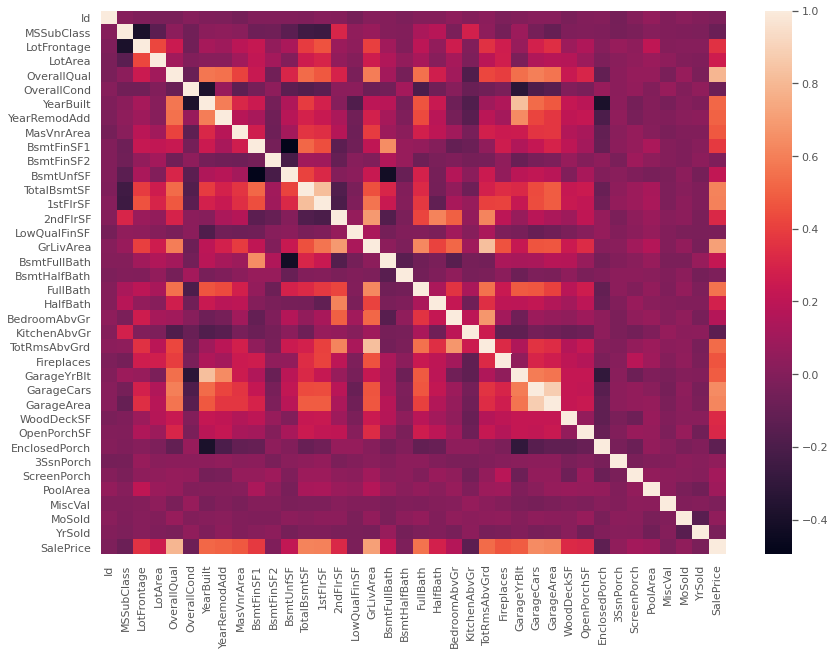

In [13]:
plt.subplots(figsize=(14, 10))
sns.heatmap(train.corr());

### Mark the biggest correlations with a target valiable - "SalePrice" on heatmap and plot them.

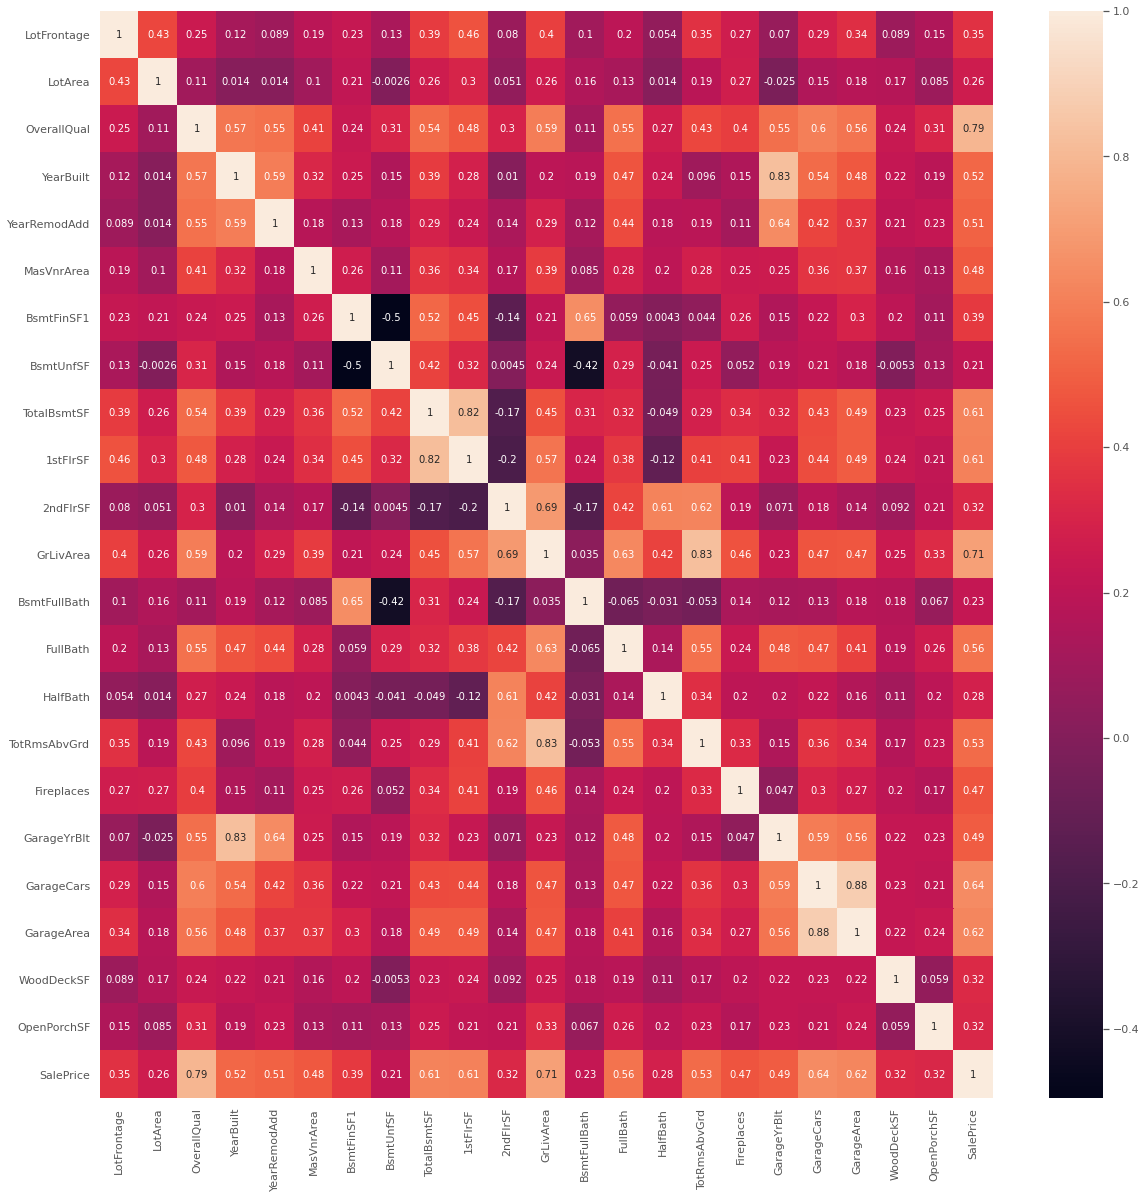

In [14]:
top_correlations = train.corr()
top_feature_columns = top_correlations['SalePrice'][top_correlations['SalePrice'].values > 0.2].index.values.tolist()
plt.figure(figsize=(20, 20))
g = sns.heatmap(train[top_feature_columns].corr(),annot=True)

## Some notes about this heatmap

1) GarageCars shows a strong correlation with GarageArea and with SalePrice feature, so one of them can be avoided to avoid multicollinearity.

2) 1stFlrSD shows a strong correaltion with TotalBsmtSF and they create multicollinearity.

3) "YearBuilt" also creates multicollinearity with "GarageYrBlt". So we have to drop "GarageYrBlt"

4) "GrLivArea"(Above ground living area square feet) correlates with "TotRmsAbvGrd"(Total rooms above grade (does not include bathrooms))

## Graphics of features, that show high correlation and create multicollinearity.

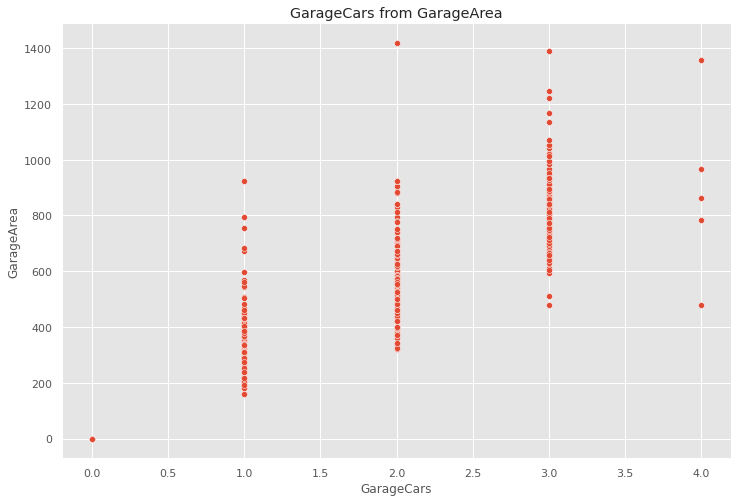

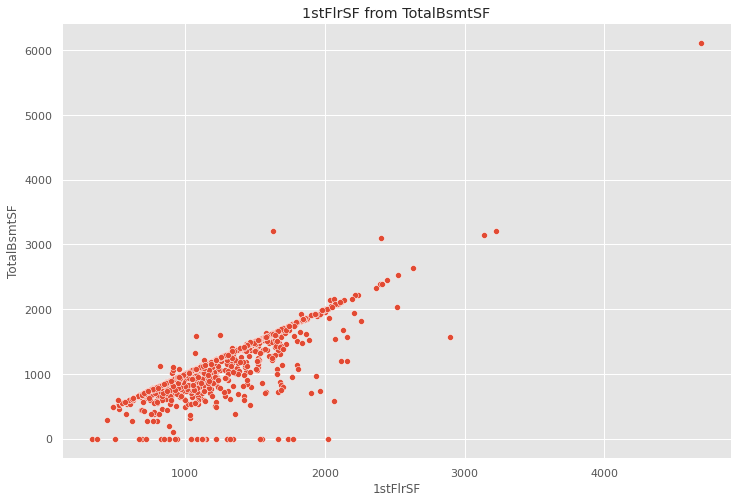

In [15]:
plt.subplots(figsize=(12, 8))
sns.scatterplot(x="GarageCars", y="GarageArea", data=train);
plt.title("GarageCars from GarageArea")
plt.show();
plt.subplots(figsize=(12, 8))
sns.scatterplot(x="1stFlrSF", y="TotalBsmtSF", data=train);
plt.title("1stFlrSF from TotalBsmtSF")
plt.show()

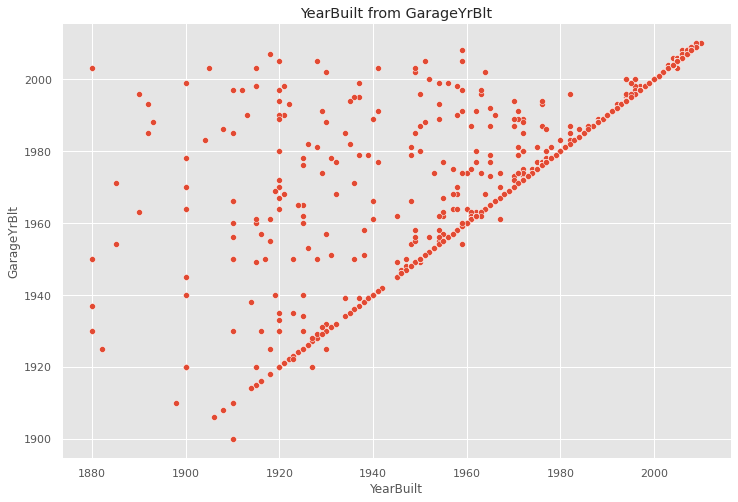

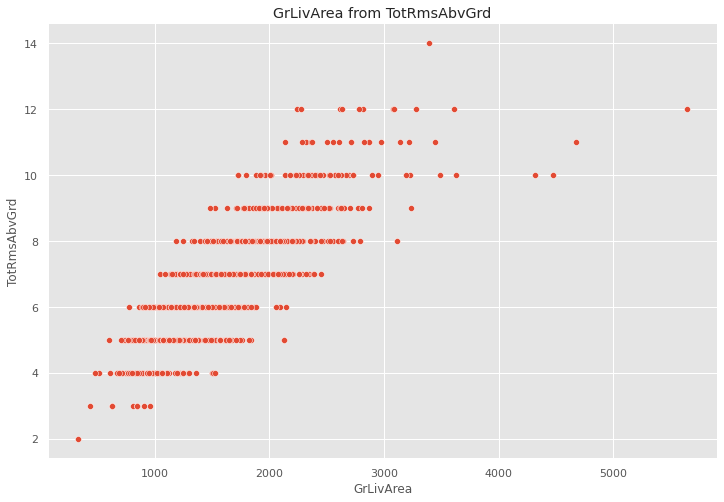

In [16]:
plt.subplots(figsize=(12, 8))
sns.scatterplot(x="YearBuilt", y="GarageYrBlt", data=train);
plt.title("YearBuilt from GarageYrBlt")
plt.show();
plt.subplots(figsize=(12, 8))
sns.scatterplot(x="GrLivArea", y="TotRmsAbvGrd", data=train);
plt.title("GrLivArea from TotRmsAbvGrd")
plt.show();

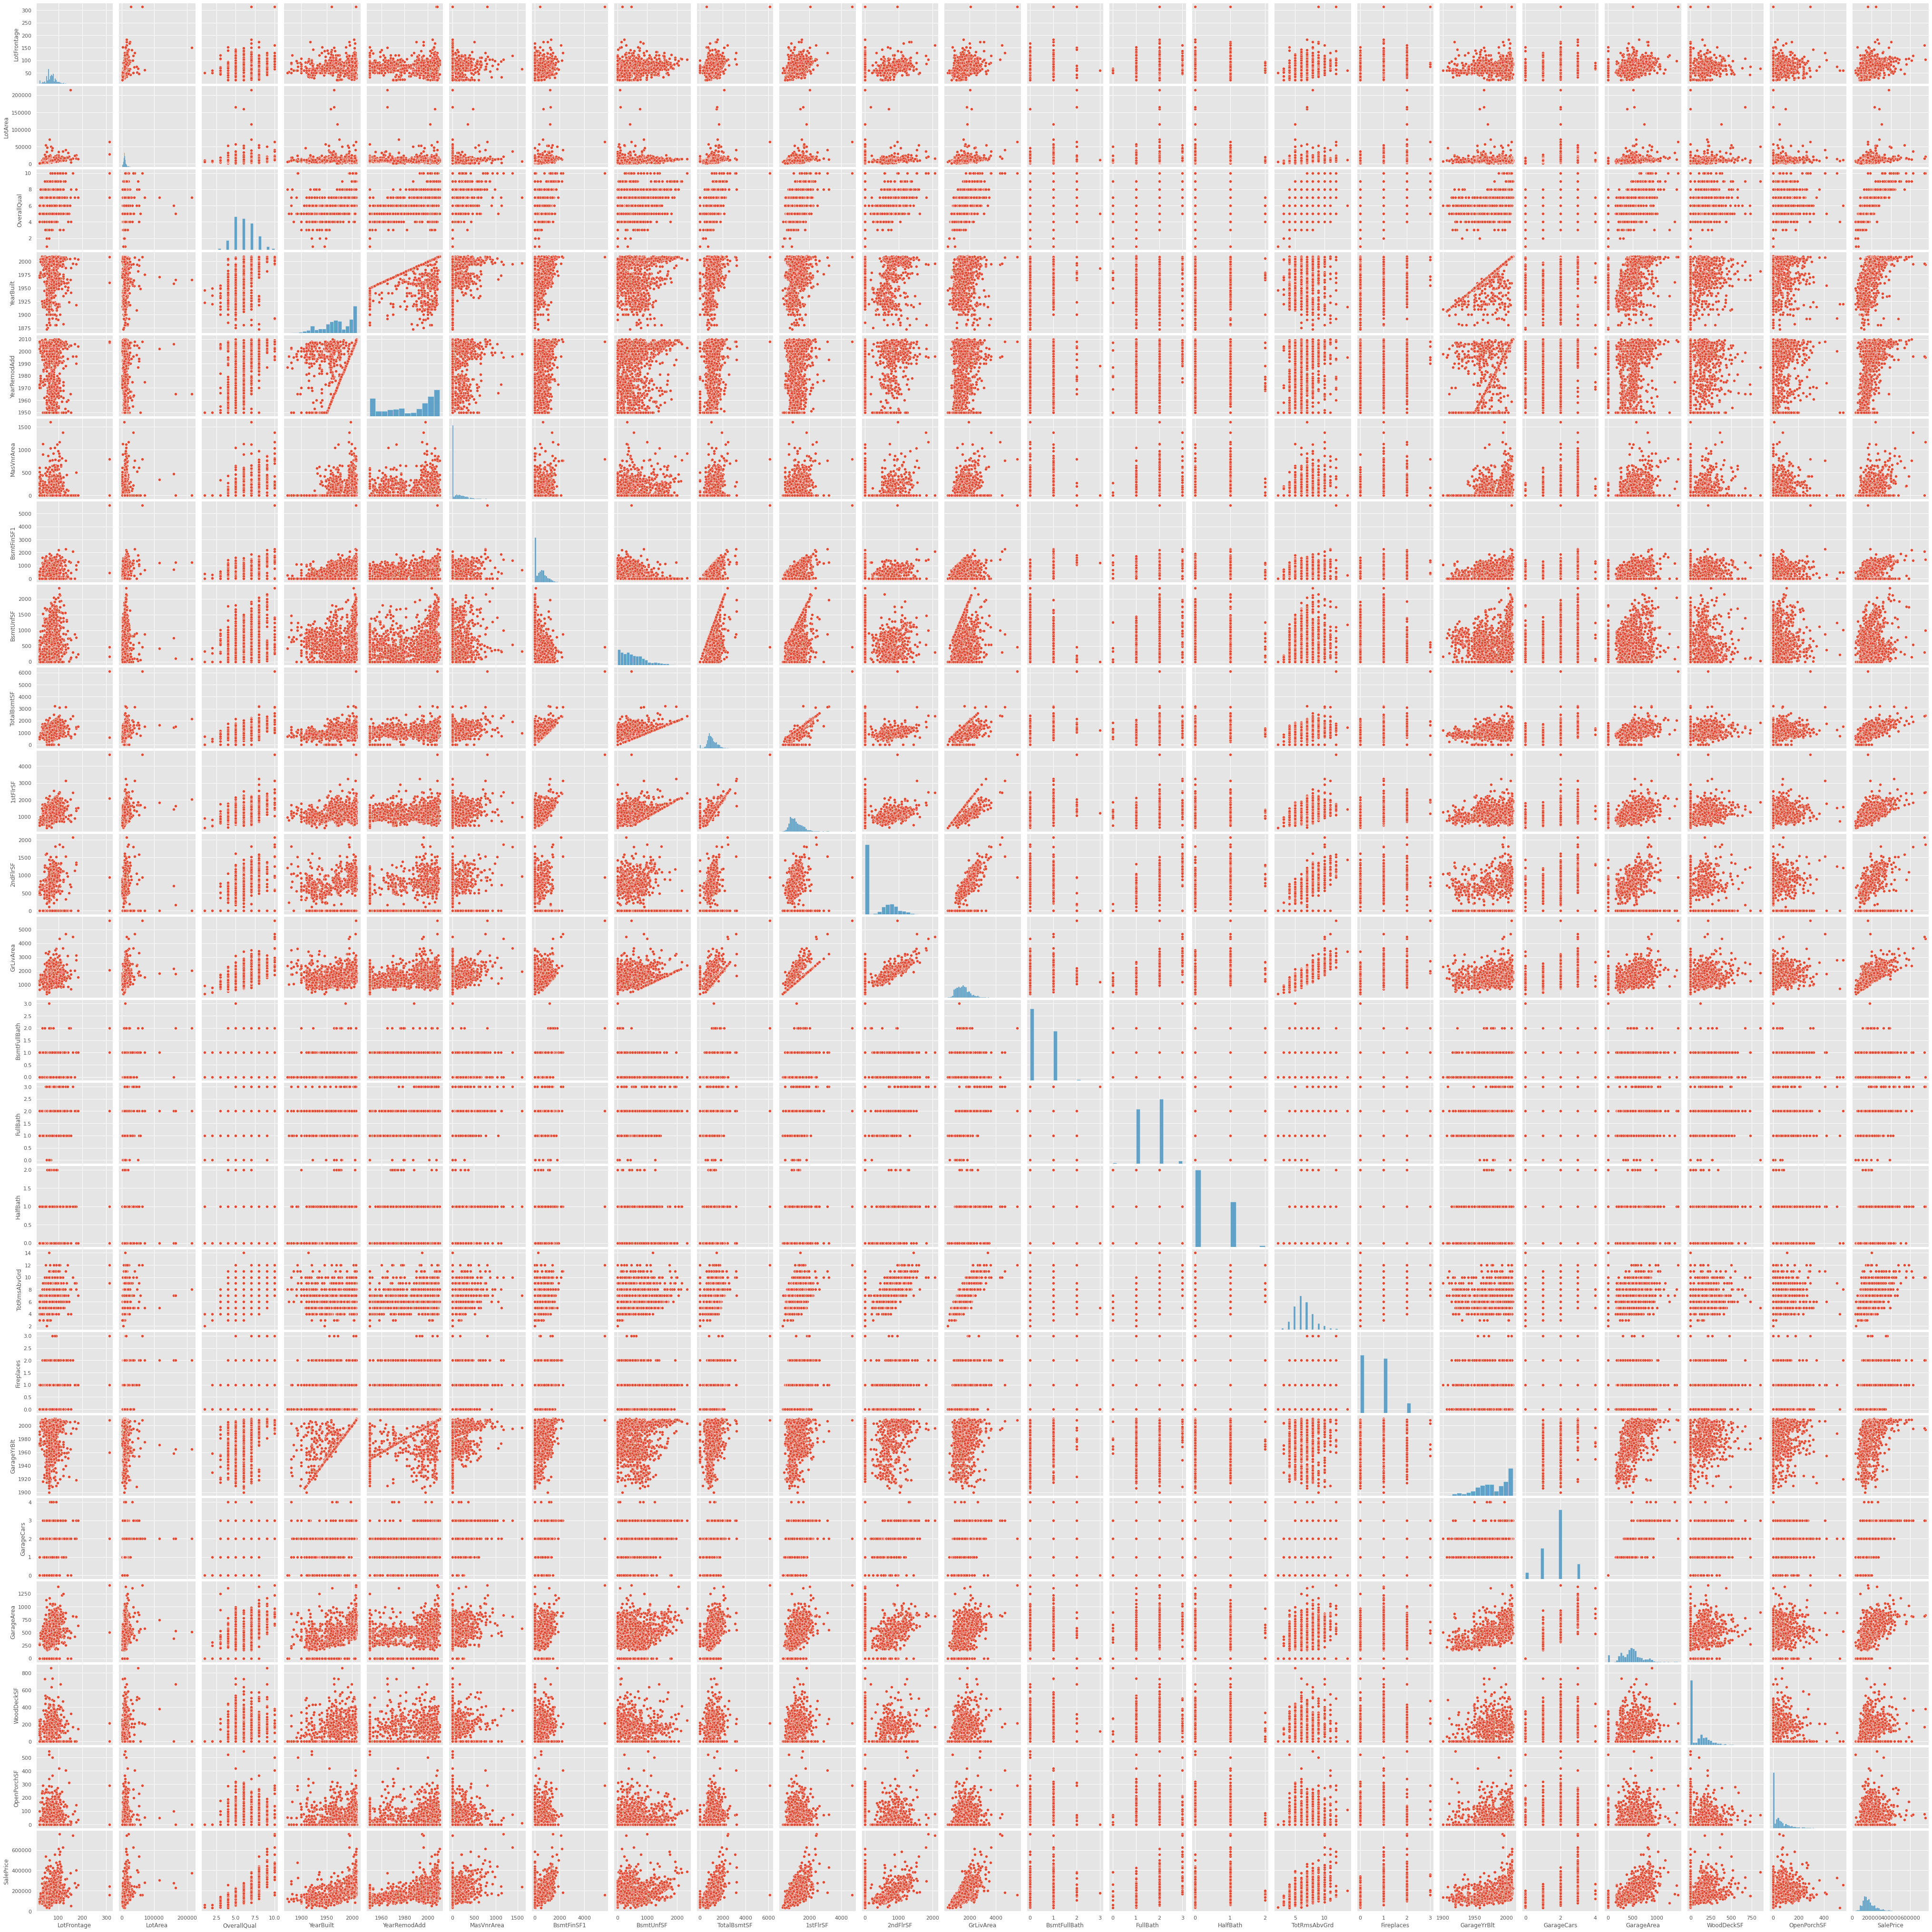

In [226]:
plt.style.use("ggplot")
sns.pairplot(train[top_feature_columns], height=2.5);

1) GarageYrBlt strongly correlates with YearBuilt

2) OverallQual(Rate of the overall material and finish of the house) correlates 
   with a target variable SalePrice, so we'll leave it of course
   
3) GrLivArea(Above ground living area square feet) correlates with 
   TotRmsAbvGrd(Total rooms above grade (does not include bathrooms))
   
   
***When independent variables are correlated (this condition is multicollinearity), it indicates that changes in one variable would also cause shifts in another variable. The stronger this correlation is, higher would be the difficulty to change one variable without changing another. This makes it difficult for the regression model to estimate the relationship between each independent variable and the dependent variable independently.***

In [17]:
train = train.drop(["GarageArea", "1stFlrSF", "GarageYrBlt", "TotRmsAbvGrd"], axis=1)
test = test.drop(["GarageArea", "1stFlrSF", "GarageYrBlt", "TotRmsAbvGrd"], axis=1)
for col in ['GarageArea', 'TotRmsAbvGrd', 'GarageYrBlt', '1stFlrSF']:
    top_feature_columns.remove(col)

# All these variables were droppped because of the multicollinearity, that I mentioned above

### Visualization of a percentage of missed values in a training dataset.

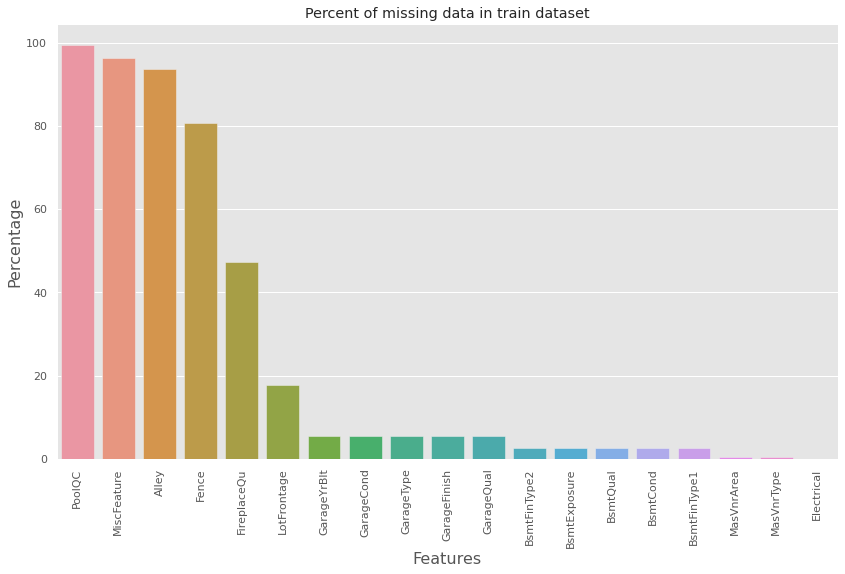

In [18]:
plt.subplots(figsize=(14, 8))
plt.xticks(rotation='90')
sns.barplot(x=miss_train.index, y=miss_train.values);
plt.xlabel("Features", fontsize=16)
plt.ylabel("Percentage", fontsize=16);
plt.title("Percent of missing data in train dataset");

### Visualization of a percentage of missed values in a test dataset.

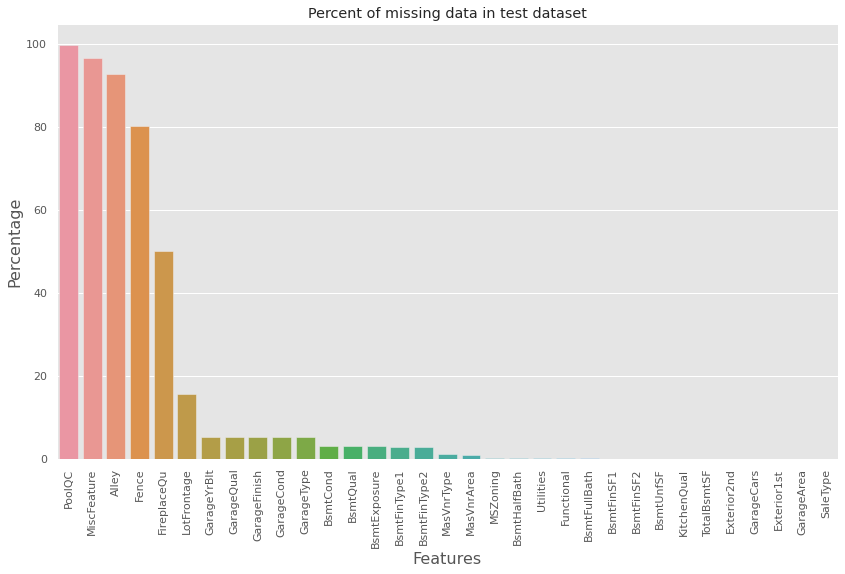

In [19]:
plt.subplots(figsize=(14, 8))
plt.xticks(rotation='90')
sns.barplot(x=miss_test.index, y=miss_test.values);
plt.xlabel("Features", fontsize=16)
plt.ylabel("Percentage", fontsize=16);
plt.title("Percent of missing data in test dataset");

### An explanation to missed values in datasets(both training and test):
Missed values in such features, like "PoolQC", "Alley", "Fence", "FireplaceQu" mean that, there is no such thing at home, like swimming pool. Respectively these features have to be left for future predictions, but they should be converted in integer or string values.
   
If Nan value is in GarageYrBlt, so it means that, the garage wasn't built and respectively there is no garage :)

### Replacing missed string categorical features with a string value "No" 
"No" means, that there is no such feature in the house and respectively if Alley = NaN => there is Alley at home

In [20]:
datasets = [train, test]
nan_no_values = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
            "GarageCond", "GarageType", "GarageFinish", "GarageQual",
            "BsmtFinType1", "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond"]

for df in datasets:
    for col in nan_no_values:
        df[col] = df[col].fillna("No")

## Now check, what features do have missing values in a dataset

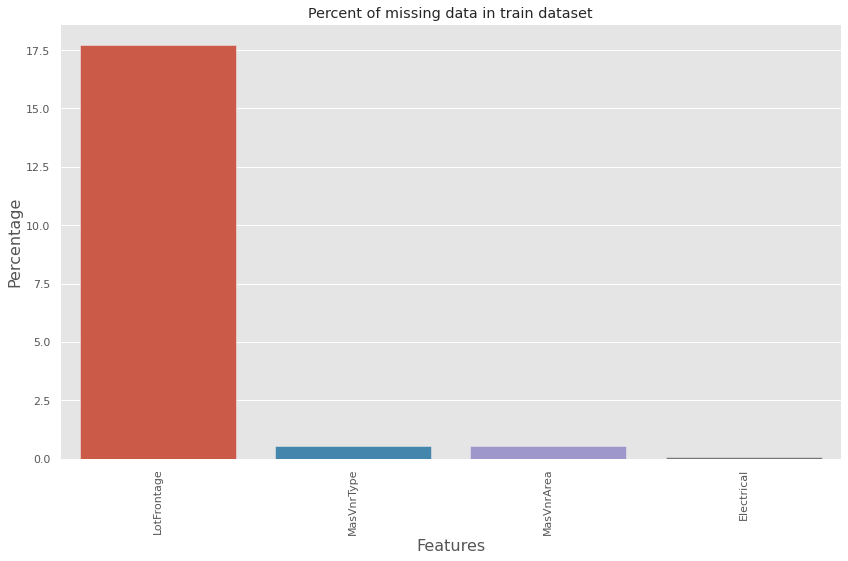

In [21]:
sum_na_train = train.isnull().sum().sort_values(ascending=False)
miss_train = sum_na_train[sum_na_train != 0].apply(lambda x: x / train.shape[0] * 100)
plt.subplots(figsize=(14, 8))
plt.xticks(rotation='90')
sns.barplot(x=miss_train.index, y=miss_train.values);
plt.xlabel("Features", fontsize=16)
plt.ylabel("Percentage", fontsize=16);
plt.title("Percent of missing data in train dataset");

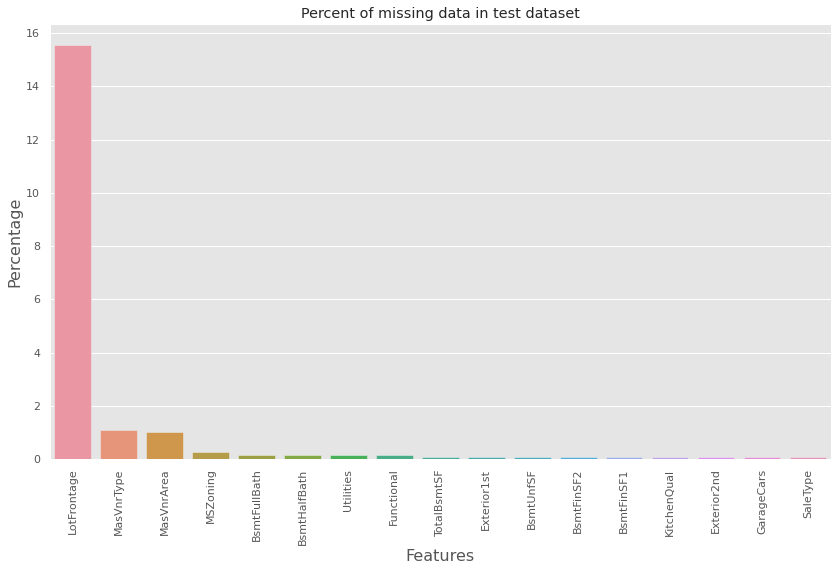

In [22]:
sum_na_test = test.isnull().sum().sort_values(ascending=False)
miss_test = sum_na_test[sum_na_test != 0].apply(lambda x: x / test.shape[0] * 100)
plt.subplots(figsize=(14, 8))
plt.xticks(rotation='90')
sns.barplot(x=miss_test.index, y=miss_test.values);
plt.xlabel("Features", fontsize=16)
plt.ylabel("Percentage", fontsize=16);
plt.title("Percent of missing data in test dataset");

### The name of the feature - quantity of missed values - data type of the feature

In [23]:
print("Train dataset:\n")
missed_values = []
for col in train.columns:
    if sum(train[col].isna()) > 0:
        print(f"|{col} - {sum(train[col].isna())} - {train.dtypes[col]}")
        missed_values.append(col)

Train dataset:

|LotFrontage - 259 - float64
|MasVnrType - 8 - object
|MasVnrArea - 8 - float64
|Electrical - 1 - object


In [24]:
print("Test dataset:\n")
missed_values_test = []
for col in test.columns:
    if sum(test[col].isna()) > 0:
        print(f"{col} - {sum(test[col].isna())} - {test.dtypes[col]}")
        missed_values_test.append(col)

Test dataset:

MSZoning - 4 - object
LotFrontage - 227 - float64
Utilities - 2 - object
Exterior1st - 1 - object
Exterior2nd - 1 - object
MasVnrType - 16 - object
MasVnrArea - 15 - float64
BsmtFinSF1 - 1 - float64
BsmtFinSF2 - 1 - float64
BsmtUnfSF - 1 - float64
TotalBsmtSF - 1 - float64
BsmtFullBath - 2 - float64
BsmtHalfBath - 2 - float64
KitchenQual - 1 - object
Functional - 2 - object
GarageCars - 1 - float64
SaleType - 1 - object


### A list of the features from a training dataset, which have missed values

In [25]:
missed_values

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical']

### Replacing missed values in the training dataset

In [26]:
train[missed_values[0]] = train.loc[:, missed_values[0]].fillna(train[missed_values[0]].median())
train[missed_values[1]] = train.loc[:, missed_values[1]].fillna("None")
train[missed_values[2]] = train.loc[:, missed_values[2]].fillna(0)
train[missed_values[3]] = train.loc[:, missed_values[3]].fillna(train[missed_values[3]].mode().values[0])

### A list of the features from a test dataset, which have missed values

In [27]:
missed_values_test

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'SaleType']

### Replacing missed values in the test dataset¶

In [28]:
test[missed_values_test[0]] = test[missed_values_test[0]].fillna(list(test["MSZoning"])[len(list(test["MSZoning"]))//2])
test[missed_values_test[1]] = test[missed_values_test[1]].fillna(test[missed_values_test[1]].median())
test[missed_values_test[2]] = test[missed_values_test[2]].fillna(test[missed_values_test[2]].mode().values[0])
test[missed_values_test[3]] = test[missed_values_test[3]].fillna(test[missed_values_test[3]].mode().values[0])
test[missed_values_test[4]] = test[missed_values_test[4]].fillna(test[missed_values_test[4]].mode().values[0])
test[missed_values_test[5]] = test[missed_values_test[5]].fillna("None")
test[missed_values_test[6]] = test[missed_values_test[6]].fillna(0)
# Filling in SaleType feature
test[missed_values_test[-1]] = test[missed_values_test[-1]].fillna(test[missed_values_test[-1]].mode().values[0])
# filling missing values in KitchenQual, Functional
test[missed_values_test[13]] = test[missed_values_test[13]].fillna(test[missed_values_test[13]].mode().values[0])
test[missed_values_test[14]] = test[missed_values_test[14]].fillna(test[missed_values_test[14]].mode().values[0])

no_test_values = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for col in no_test_values:
    test[col] = test[col].fillna(0)

zero_test_values = ['GarageCars']
for col in zero_test_values:
    test[col] = test[col].fillna(0)

### Quantity of missed values in the training dataset after all replacings and so on

In [29]:
missed_values = []
for col in train.columns:
    if sum(train[col].isna()) > 0:
        print(f"|{col} - {sum(train[col].isna())} - {train.dtypes[col]}")
        missed_values.append(col)
if len(missed_values) == 0:
    print("Seems there is no nan-values in train dataset :)")

Seems there is no nan-values in train dataset :)


### Quantity of missed values in the test dataset after all replacings and so on

In [30]:
missed_values_test = []
for col in test.columns:
    if sum(test[col].isna()) > 0:
        print(f"|{col} - {sum(test[col].isna())} - {test.dtypes[col]}")
        missed_values_test.append(col)
if len(missed_values_test) == 0:
    print("Seems there is no nan-values in test dataset :)")

Seems there is no nan-values in test dataset :)


### Detecting and work with outliers

In [31]:
possible_outliers = []
for col in train.columns:
    if col != "Id":
        if train[col].dtype == "float64" or train[col].dtype == "int64":
            possible_outliers.append(col)

def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

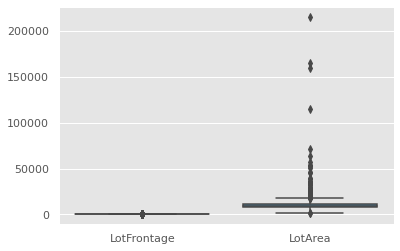

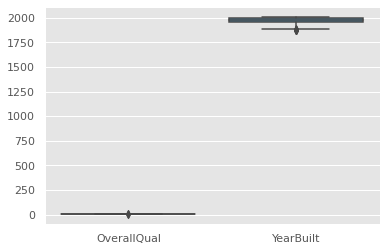

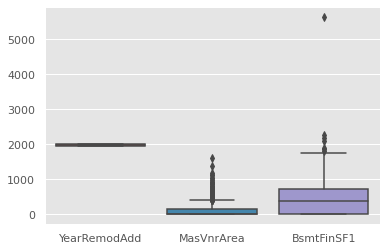

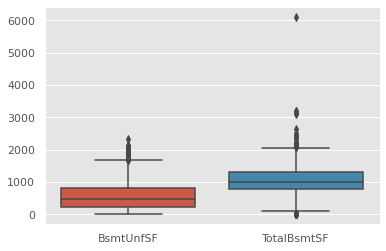

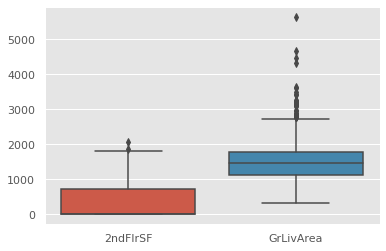

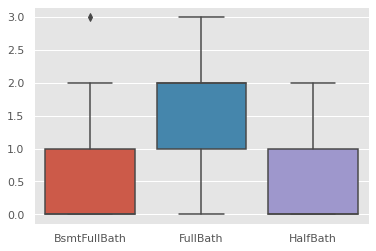

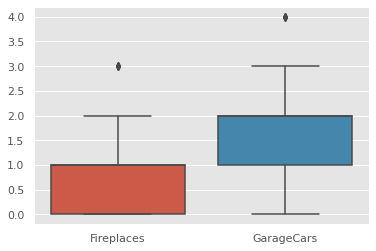

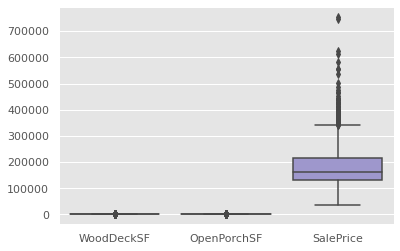

In [32]:
divide_et_impera = chunkIt(top_feature_columns, 8)
for i in range(len(divide_et_impera)):
    sns.boxplot(data=train[divide_et_impera[i]])
    plt.show()

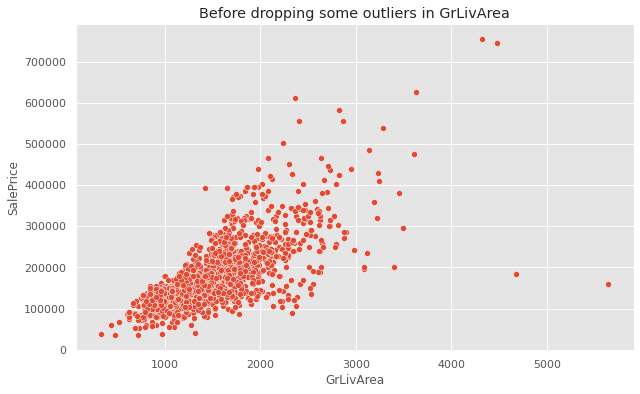

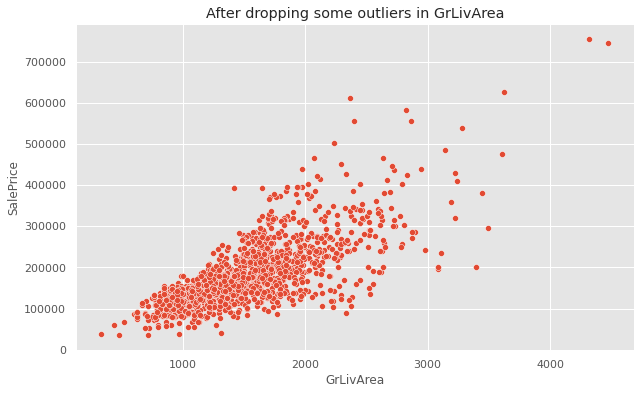

In [33]:
plt.subplots(figsize=(10, 6))
plt.title("Before dropping some outliers in GrLivArea")
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train);
plt.show()
# dropping of outliers
train = train.loc[train["GrLivArea"] < 4500, :]
# dropping of outliers
plt.subplots(figsize=(10, 6))
plt.title("After dropping some outliers in GrLivArea")
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train);
plt.show();

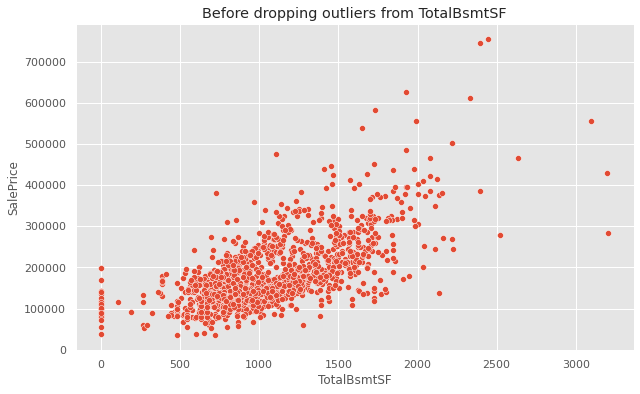

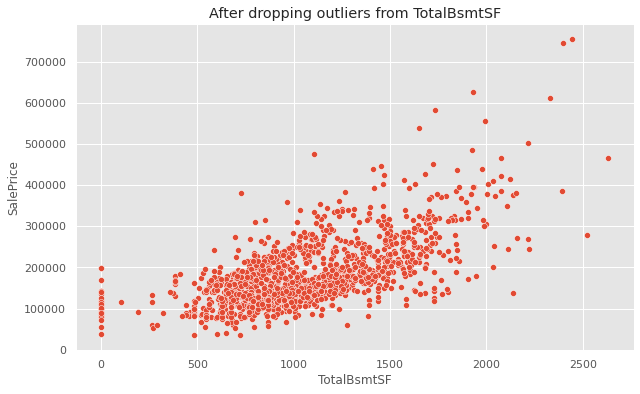

In [34]:
plt.subplots(figsize=(10, 6))
plt.title("Before dropping outliers from TotalBsmtSF")
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=train);
plt.show()
# ------dropping outliers------
train = train.loc[train["TotalBsmtSF"] < 3000, :]
# ------dropping outliears------
plt.subplots(figsize=(10, 6))
plt.title("After dropping outliers from TotalBsmtSF")
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=train);
plt.show();

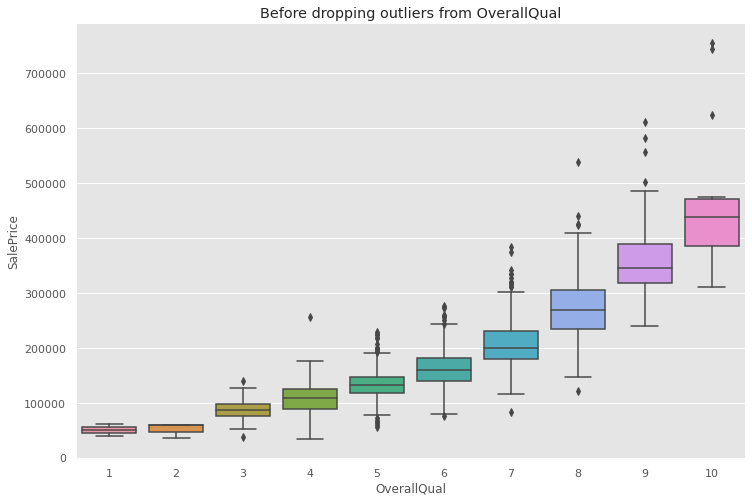

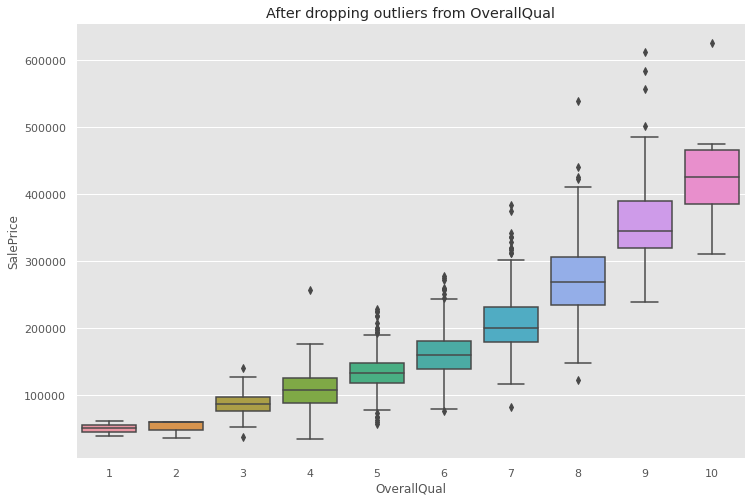

In [35]:
plt.subplots(figsize=(12, 8))
plt.title("Before dropping outliers from OverallQual")
sns.boxplot(x="OverallQual", y="SalePrice", data=train);
plt.show()
# ------dropping outliers------
train = train.loc[train["SalePrice"] < 650000, :]
# ------dropping outliers------
plt.subplots(figsize=(12, 8))
plt.title("After dropping outliers from OverallQual")
sns.boxplot(x="OverallQual", y="SalePrice", data=train);
plt.show();

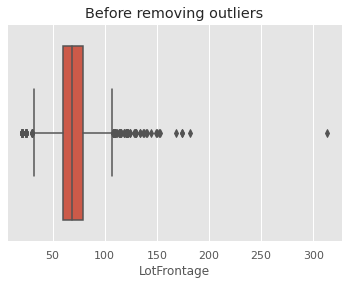

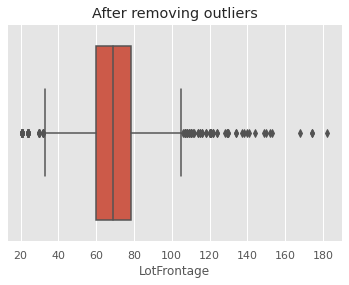

In [36]:
sns.boxplot(x=train["LotFrontage"]);
plt.title("Before removing outliers")
plt.show()
train["LotFrontage"] = train.query("LotFrontage < 250")["LotFrontage"]
sns.boxplot(x=train["LotFrontage"]);
plt.title("After removing outliers")
plt.show()

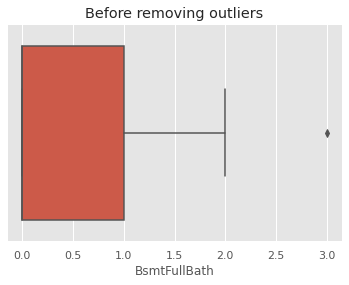

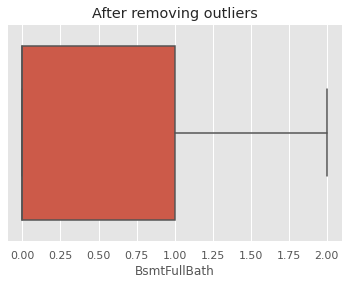

In [37]:
sns.boxplot(x=train["BsmtFullBath"]);
plt.title("Before removing outliers")
plt.show()
train["BsmtFullBath"] = train.query("BsmtFullBath < 2.8")["BsmtFullBath"]
sns.boxplot(x=train["BsmtFullBath"]);
plt.title("After removing outliers")
plt.show()

### Select the best features that positively correlates with SalePrice

remove 'BsmtFinSF1', 'BsmtUnfSF', because train dataset has 'TotalBsmtSF', that best descripts info about Basement in the house 
remove 'BsmtFullBath' because it weakly correlates with SalePrice, but 'FullBath' does it much better and 'FullBath' has info about 'BsmtFullBath'

In [38]:
drop_features = ['BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath', "HalfBath", "SalePrice"]
X = train[top_feature_columns]
X = X.drop(drop_features, axis=1)
X["LotFrontage"] = X["LotFrontage"].fillna(X["LotFrontage"].mean())

### Glance at skewness of distribution of features in X

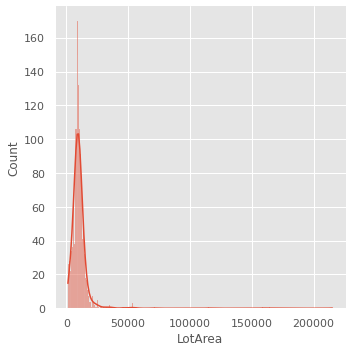

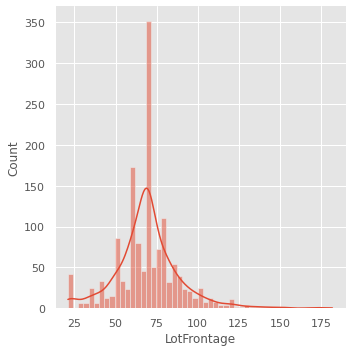

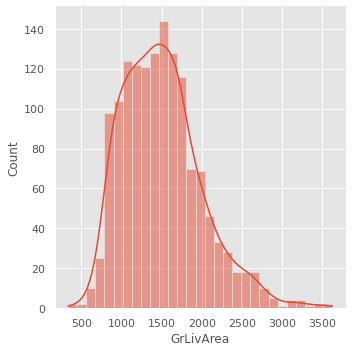

In [39]:
for col in ["LotArea", "LotFrontage", "GrLivArea"]:
    sns.displot(x=col, data=X, kde=True)

### Everything is fixed, so linear regression will work much better and will explain all trends in the dataset

In [40]:
X["LotArea"] = np.log1p(np.log1p(X["LotArea"]))
X["LotFrontage"] = np.log1p(X["LotFrontage"])
X["GrLivArea"] = np.sqrt(X["GrLivArea"])

### Skewness is fixed

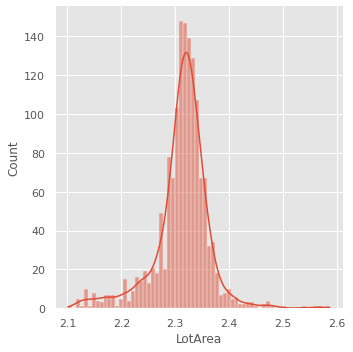

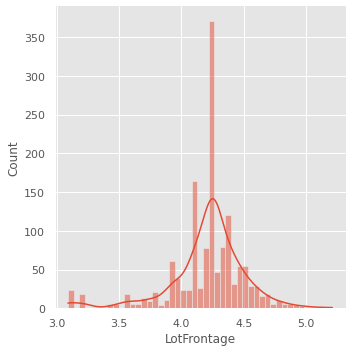

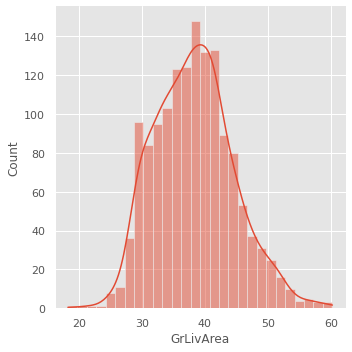

In [41]:
sns.displot(X["LotArea"], kde=True)
plt.show()
sns.displot(X["LotFrontage"], kde=True)
plt.show()
sns.displot(X["GrLivArea"], kde=True)
plt.show()

In [42]:
y = train["SalePrice"]

## As a metric for this project I have chosen RMSE(Root Mean Square Error)

In [43]:
"""Module with class to fit a ridge regression model and also make predictions."""
class RidgeRegression:
    """Class to fit a ridge regression model on a given training set, and make predictions on data.
    Specifically, the cost function with L_2 regularization is assumed to be:
        ||w - Xw||^2_2 + alpha * ||w||2_2
    where,
        w = Model weights,
        X = Data design matrix,
        alpha = regularization parameter.
    The class uses batch gradient descent to optimize the model weights.
    """

    def __init__(self, learning_rate: float, reg_strength: float, max_iter: int) -> None:
        """Initialize.
        Args:
            learning_rate (float): Learning rate for gradient descent.
            reg_strength (float): Regularization parameter, to control the bias-variance tradeoff.
            max_iter (int): Number of iterations to run gradient descent.
        """
        self.learn_rate = learning_rate
        self.reg_strength = reg_strength
        self.max_iter = max_iter
        self._weights: np.array
        self.design_matrix: np.array
        self.y_train: np.array
        self.train_size: int
        self.num_feats: int

    @property
    def weights(self):
        """Return ridge regression model weights."""
        return self._weights

    def fit(self, x_train, y_train) -> None:
        """Fit model weights to training data."""
        self.train_size, self.num_feats = x_train.shape
        self.design_matrix = np.append(np.ones(self.train_size).reshape(
            -1, 1), x_train, axis=1)  # Add one for the intercept term for all training examples.
        self.y_train = y_train.to_numpy()
        self._weights = np.zeros(self.num_feats + 1)  # +1 for the intercept.

        self.optimize_weights()

    def optimize_weights(self) -> None:
        """Optimize model weights for self.max_iter iterations."""
        for _ in range(self.max_iter):
            self.update_step()

    def update_step(self) -> None:
        """Update model weights with batch gradient descent step.
        Recall, the update statement for a model weight theta_k is:
            theta_k = theta_k - (learn_rate * J_theta_k)
            where J_theta_k = cost function
                  J_theta_k = (2 / train_size) * ( ((y_hat - y_real) * x_k) + (alpha * theta_k^2))
        """
        y_hat = (self._weights * self.design_matrix).sum(axis=1)
        errors = (y_hat - self.y_train).reshape(-1, 1)

        j_theta = (2 / self.train_size) * ((errors * self.design_matrix).sum(axis=0) +
                                           (self.reg_strength * self._weights))
        step = self.learn_rate * j_theta

        self._weights = self._weights - step.reshape(-1)

    def predict(self, x_test):
        """Make predictions for x_test using trained model.
        Args:
            x_test (np.array): Input test data set.
        Returns:
            np.array: Predictions for x_test.
        """
        test_size = x_test.shape[0]
        x_test = np.append(np.ones(test_size).reshape(-1, 1), x_test, axis=1)

        return (self._weights * x_test).sum(axis=1)

    def RMSE(self, X_test, y_test) -> np.float64:
        """The Root Mean Squared Error, or RMSE, is an extension of the mean squared error.
        The square root of the error is calculated, which means that the units of the RMSE are the same 
        as the original units of the target value that is being predicted.
        Args:
            X_test (np.array): Input test data set.
            y_test (np.array): Input labels of the test data set
        Returns:
            rmse (np.float64): The Root Mean Square Error of test data set
        """
        rmse = np.sqrt(np.sum(np.power(y_test.ravel() - self.predict(X_test), 2)) / y_test.shape[0])
        return rmse
    

def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X, mean, std

def hyperparam_tuning(learn_rates, alphas, iterations):
    minimum = 100000000000
    for i in learn_rates:
        for j in alphas:
            for k in iterations:
                model = RidgeRegression(i, j, k)
                model.fit(X_train, y_train)
                rmse = model.RMSE(X_test, y_test)
                if rmse < minimum:
                    minimum = rmse
                    best_vals = {"learning_rate": i, "alpha" : j, "iterations" : k}
    return RidgeRegression(best_vals["learning_rate"], best_vals["alpha"], best_vals["iterations"])

## Normalize, split X dataset on train and cross-validation dataset

In [44]:
X, mean, std = normalize(X)
vals = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
iterations = [100, 200, 500, 1000, 2000, 4000, 5000, 7500, 8000, 10000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)

## Find the best parameters for Ridge Regression

In [45]:
model = hyperparam_tuning(vals, vals, iterations)

### RMSE is a pretty good. Let's head to predicting test dataset

In [46]:
model.fit(X_train, y_train)
model.predict(X_test)
model.RMSE(X_test, y_test)

33328.82422016866

## Generate and normalize test dataset for predicting house prices

#### Remove "SalePrice" from top_features and drop_features, because it's out target-variable

In [47]:
top_feature_columns.remove("SalePrice")
drop_features.remove("SalePrice")

## Transform test dataset a little bit 

In [48]:
test_X = test[top_feature_columns]
test_X = test_X.drop(drop_features, axis=1)
test_X, mean, std = normalize(test_X)

## Predict house prices

In [49]:
prediction = pd.DataFrame({"Id" : Id, "SalePrice" : model.predict(test_X)})

## Save the results

In [50]:
os.chdir("../")
prediction.to_csv("prediction.csv")

In [55]:
prediction

Id      SalePrice
0     1461  114042.291289
1     1462  175724.013653
2     1463  186390.233645
3     1464  200487.091327
4     1465  197257.711684
...    ...            ...
1454  2915   72095.342775
1455  2916   81671.949377
1456  2917  191442.825178
1457  2918  124115.263848
1458  2919  237506.817515

[1459 rows x 2 columns]